In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle competitions download -c cifar-10

 99% 709M/715M [00:03<00:00, 157MB/s]
100% 715M/715M [00:03<00:00, 193MB/s]


In [3]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [4]:
from zipfile import ZipFile
df = '/content/cifar-10.zip'
with ZipFile(df,'r') as zip:
  zip.extractall()
  print('The Dataset is extracted')

The Dataset is extracted


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [6]:
! pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 823.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.0 MB/s eta 0:00:00


In [7]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

In [8]:
! ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [9]:
#  importing the depensencies

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from sklearn.model_selection import train_test_split


In [10]:
filenames = os.listdir('/content/train')

In [11]:
type(filenames)

list

In [12]:
len(filenames)

50000

In [13]:
print(filenames[0:5])
print(filenames[-5:])

['42230.png', '30131.png', '17172.png', '41364.png', '24943.png']
['32838.png', '35715.png', '23717.png', '31188.png', '16475.png']


In [14]:
# labels processing
labels_df = pd.read_csv('/content/trainLabels.csv')

In [15]:
labels_df.shape

(50000, 2)

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df[labels_df['id']== 7796]

,id,label
7795,7796,frog


In [18]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [20]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [21]:
label_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [label_dict[i] for i in labels_df['label']]

In [22]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


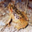

In [23]:
import cv2
img = cv2.imread('/content/train/7796.png')

from google.colab.patches import cv2_imshow
cv2_imshow(img)

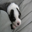

In [24]:
img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [25]:
id_list = list(labels_df['id'])


In [26]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [27]:
#  converting image as numpy array
train_data_folder = '/content/train/'
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id)+'.png')
  image = np.array(image)
  data.append(image)


In [28]:
type(data)

list

In [29]:
len(data)

50000

In [30]:
type(data[0])

numpy.ndarray

In [31]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
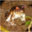

In [32]:
data[0]

In [33]:
#  convert images_list and labels_list to numpy array

X = np.array(data)
Y = np.array(labels)

In [34]:
type(X)

numpy.ndarray

In [35]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [36]:
# train test split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [38]:
#  scaling the data
X_train_scale = X_train/255
X_test_scale = X_test/ 255

In [39]:
print(X_train_scale)

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

In [40]:
#  builing neural network

from tensorflow import keras

In [41]:
num_of_classes = 10

#  setting up the layers or neural network

model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),keras.layers.Dense(64,activation ='relu'),keras.layers.Dense(num_of_classes,activation='softmax')])



In [42]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [43]:
# training the neural network
model.fit(X_train_scale,Y_train,validation_split = 0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9526 - acc: 0.2902 - val_loss: 1.8262 - val_acc: 0.3307
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8331 - acc: 0.3447 - val_loss: 1.7774 - val_acc: 0.3688
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7880 - acc: 0.3584 - val_loss: 1.7488 - val_acc: 0.3672
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7629 - acc: 0.3697 - val_loss: 1.7617 - val_acc: 0.3638
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7398 - acc: 0.3768 - val_loss: 1.7294 - val_acc: 0.3805
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7232 - acc: 0.3824 - val_loss: 1.7021 - val_acc: 0.3950
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7100 - acc: 0.3882 - val_loss: 1.7062 - val_acc: 0.3900
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [44]:
#  using ResNet50 for processing

from tensorflow.keras import Sequential, models,layers
from tensorflow.keras.layers import  Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import  load_model
from tensorflow.keras.models import  Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [45]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [46]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation = 'softmax'))

In [47]:
model.compile(optimizer = optimizers.RMSprop(lr=2e-5), loss= 'sparse_categorical_crossentropy',metrics = ['acc'])


<!--  more epochs can be run but i do not have acces to GPU in colab so i use only 1 epoch -->

In [51]:
history = model.fit(X_train_scale,Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 [==============================] - 427s 379ms/step - loss: 1.9561 - acc: 0.2543 - val_loss: 2.0086 - val_acc: 0.2132
Epoch 2/10
1125/1125 [==============================] - 430s 382ms/step - loss: 1.8075 - acc: 0.3146 - val_loss: 1.7904 - val_acc: 0.3647
Epoch 3/10
1125/1125 [==============================] - 423s 376ms/step - loss: 1.6804 - acc: 0.3748 - val_loss: 1.9528 - val_acc: 0.3228
Epoch 4/10
1125/1125 [==============================] - 424s 377ms/step - loss: 1.5670 - acc: 0.4282 - val_loss: 5.2692 - val_acc: 0.3072
Epoch 5/10
1125/1125 [==============================] - 432s 384ms/step - loss: 1.4695 - acc: 0.4724 - val_loss: 1.3628 - val_acc: 0.5255
Epoch 6/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.3096 - acc: 0.5454 - val_loss: 1.1430 - val_acc: 0.5918
Epoch 7/10
1125/1125 [==============================] - 426s 379ms/step - loss: 1.1886 - acc: 0.5951 - val_loss: 1.0166 - val_acc: 0.6485
Epoch 8/10
1125/1125 [============

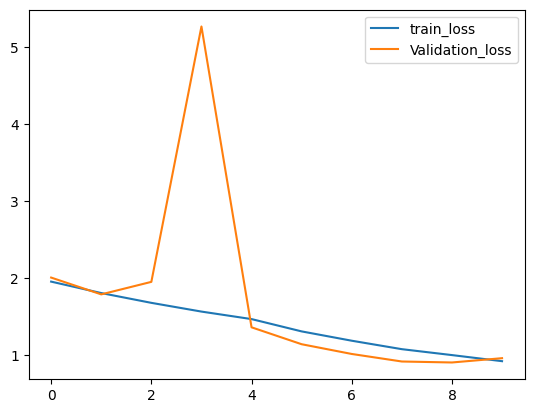

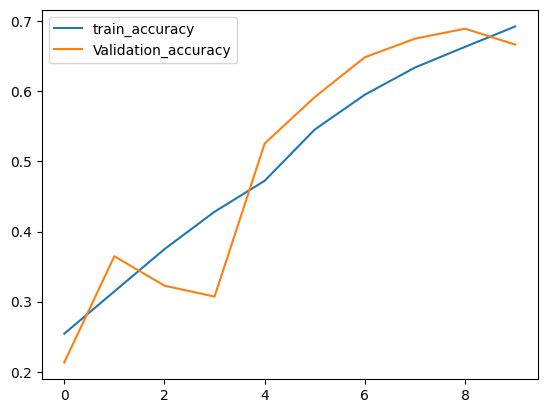

In [52]:
 h = history
#   plot the loss
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'Validation_loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label = 'train_accuracy')
plt.plot(h.history['val_acc'], label = 'Validation_accuracy')
plt.legend()
plt.show()
